##Computer Vision (Spring 2021)

Instructors: Muhammad Fahim, Riby Abraham Boby


**Acknowledgement**<br>
This lab was maintained by Riby, Marcus, Rufina, Alex and Fahim
<br><br>

This lab was created by: Alex<br>
Email: a.grashchenkov@innopolis.ru<br>
Links: [github](https://github.com/AlexandrGraschenkov)

## Lab Objectives
Line Hough Transform

#### Prepare

In [1]:
!wget "https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a" -O paper_test.jpg
!wget https://docs.opencv.org/master/water_coins.jpg -O coins.jpg
!wget "https://drive.google.com/uc?export=view&id=1f2aZ1L2xxdrPFSF_X2b5pkzwz80R-t-s" -O coins2.jpg

--2021-03-02 08:36:49--  https://drive.google.com/uc?export=view&id=1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a
Resolving drive.google.com (drive.google.com)... 74.125.128.113, 74.125.128.138, 74.125.128.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e2p47budpbck4j227475tok24avnn2mn/1614674175000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view [following]
--2021-03-02 08:36:49--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e2p47budpbck4j227475tok24avnn2mn/1614674175000/17396682441590382856/*/1H64BwqU30_MTsT_7sWZ66ijFt1vL4b8a?e=view
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.go

In [2]:
# all plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time, cv2, math
from typing import AnyStr, Any, Callable

In [3]:
# function to read and resize an image
def read_and_resize(filename: str, grayscale: bool = False, fx: float = 1.0, fy: float = 1.0):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    if fx != 1.0 and fy != 1.0:
      img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def show_in_row(list_of_images: list, titles: list = None, disable_ticks: bool = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

Hough Circle


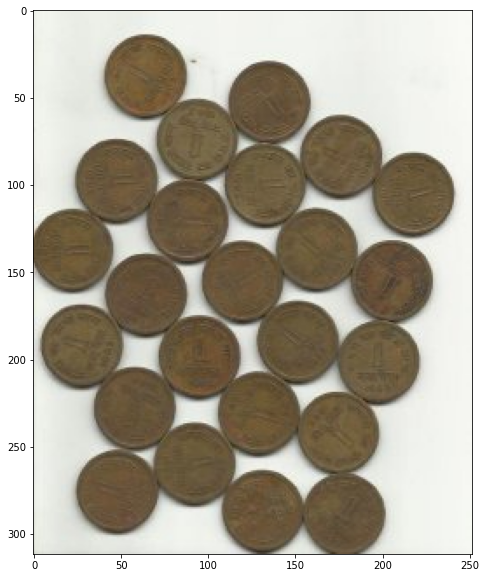

In [4]:
coinsin = read_and_resize("coins.jpg")
show_in_row([coinsin])

Number of coins: 24


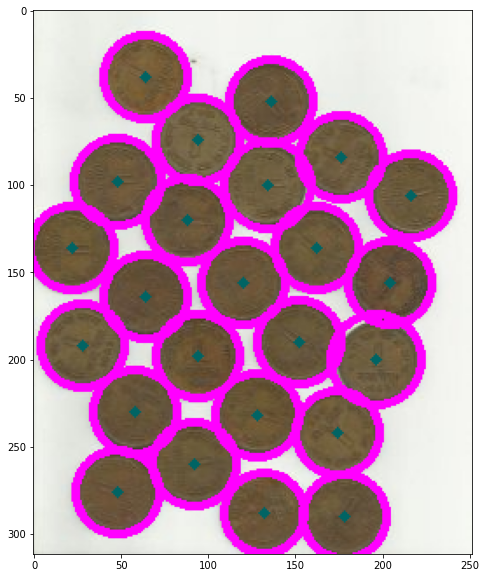

In [5]:
coins=coinsin.copy()
coinsgray=cv2.cvtColor(coinsin,cv2.COLOR_BGR2GRAY)
circles=cv2.HoughCircles(coinsgray, cv2.HOUGH_GRADIENT, 1, coinsgray.shape[0] / 8,
                               param1=100, param2=30,
                               minRadius=20, maxRadius=30)
if circles is not None:
  print('Number of coins:',len(circles[0,:]))
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(coins, center, 1, (0, 100, 100), 3)
    # circle outline
    radius = i[2]
    cv2.circle(coins, center, radius, (255, 0, 255), 3)
show_in_row([coins])    


How many coins can be found in the input image [link](https://drive.google.com/file/d/1f2aZ1L2xxdrPFSF_X2b5pkzwz80R-t-s/view?usp=sharing)


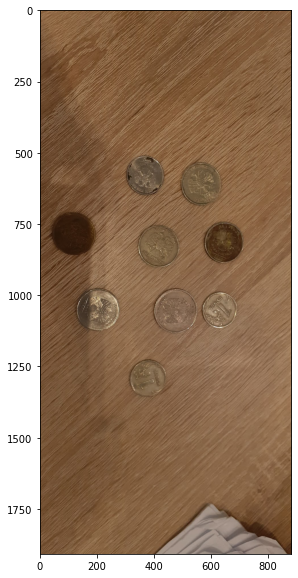

In [6]:
coinsin2 = read_and_resize("coins2.jpg")
show_in_row([coinsin2])


Number of coins: 9


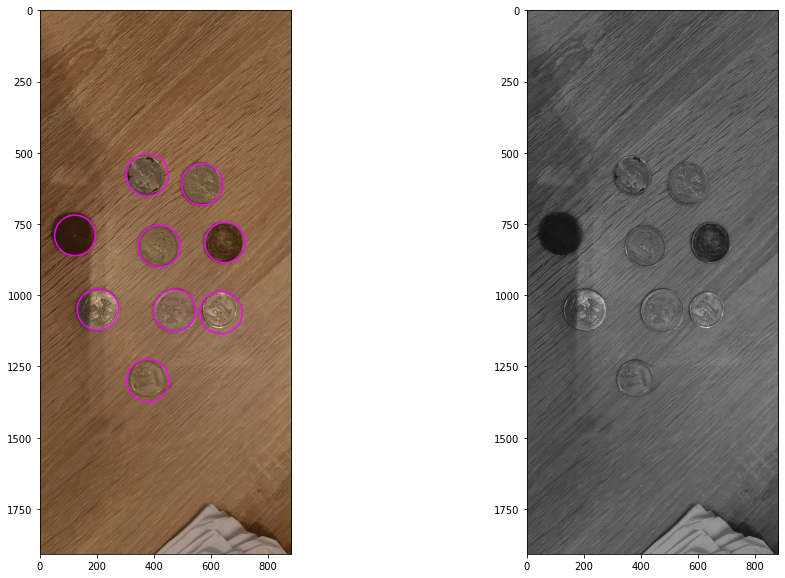

In [15]:
coins2=coinsin2.copy()
coinsgray2=cv2.cvtColor(coinsin2,cv2.COLOR_BGR2GRAY)

circles2=cv2.HoughCircles(coinsgray2, cv2.HOUGH_GRADIENT, 1, coinsgray2.shape[0] / 16,
                               param1=6, param2=55,
                               minRadius=45, maxRadius=75)

if circles2 is not None:
  print('Number of coins:',len(circles2[0,:]))
  circles = np.uint16(np.around(circles2))
  for i in circles2[0, :]:
    center2 = (i[0], i[1])
    # circle center
    cv2.circle(coins2, center2, 1, (0, 100, 100), 3)
    # circle outline
    radius2 = i[2]
    cv2.circle(coins2, center2, radius2, (255, 0, 255), 3)
show_in_row([coins2, coinsgray2]) 

### Find paper

Corners found


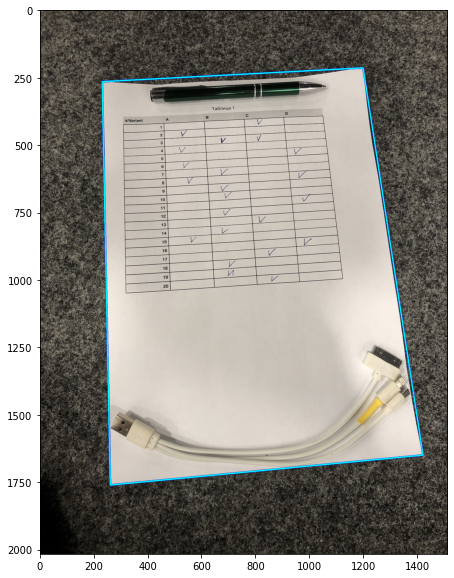

In [20]:
#TODO
def find_paper_corners(color_img: np.array) -> np.array:
  img_gray = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
  
  th, thresh = cv2.threshold(img_gray, 170, 255, cv2.THRESH_OTSU)
  
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  
  max_area=0
  for i,cnt in enumerate(contours):
    if cv2.contourArea(cnt)>max_area: 
      a = cv2.approxPolyDP(cnt, epsilon=0.05*cv2.arcLength(cnt, closed=True), closed=True)
      max_area=cv2.contourArea(cnt)
  
  return np.array([np.array(a[i][0]) for i in range(len(a))])


corners = find_paper_corners(img)

if corners.shape == (4, 2):
  print("Corners found")
  img_copy=cv2.polylines(img_copy, [corners], True, (0,255,255), 4)
  show_in_row([img_copy])

else:
  
  print("Shape must contain information about all the four corners")


# Undistort the detected region

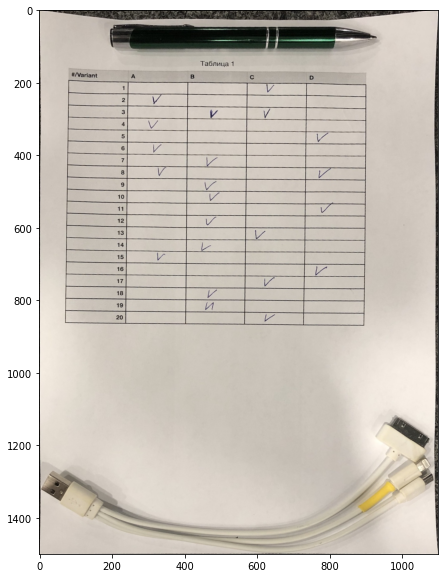

In [24]:
# TODO

def undistort_perspective(img: np.array, corners: np.array) -> np.array:
  w=1100
  h=1500

  Points = np.array([[0, 0], [w, 0], [w, h], [0, h]], np.int32)
  corners = np.int0([corners[1],corners[0],corners[3],corners[2]])
  M,_ = cv2.findHomography(corners, Points,cv2.RANSAC)
  new_Img = cv2.warpPerspective(img,M,(w,h))
  return new_Img


paper = undistort_perspective(img, corners)
show_in_row([paper])

# Check for answers
Use HougLines() to detect the black horizonatal and vertical lines

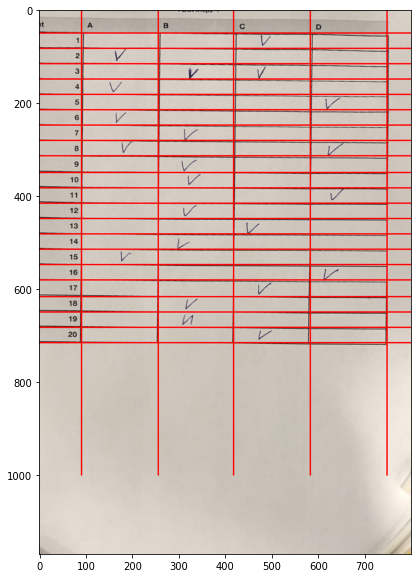

[['C'], ['A'], ['C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], ['A'], ['D'], ['C'], ['B'], ['B'], ['C']]
Yet to complete


In [33]:
# Todo

def find_answers(color_img: np.array) -> list:
  
  img = color_img.copy()
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray,200,200,apertureSize = 3)

  lines_r = cv2.HoughLines(edges,3,np.pi/90,500)

  lines_hor = []
  lines_vert = []

  for i in range(len(lines_r)):
    for rho,theta in lines_r[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
        if a == 1.0:
          lines_vert.append([x1, y1, x2, y2])
        else:
          lines_hor.append([x1, y1, x2, y2])

  lines_vert.sort(key=lambda x: x[0])
  lines_hor.sort(key=lambda x: x[1])

  answers = []
  
  show_in_row([img])

  for i in range(len(lines_hor) - 1):

    curr_answers = []

    for j in range(len(lines_vert) - 1):
      x1 = lines_vert[j][0]
      x2 = lines_vert[j + 1][0]
      y1 = lines_hor[i][1]
      y2 = lines_hor[i + 1][1]

      rect = color_img[y1 + 10 :y2 - 10, x1 + 10 :x2 - 10, :]
      gray = cv2.cvtColor(rect, cv2.COLOR_RGB2GRAY)
      ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
      contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

      if len(contours) > 1:
        if (j == 0):
          curr_answers.append('A')
        if (j == 1):
          curr_answers.append('B')
        if (j == 2):
          curr_answers.append('C')
        if (j == 3):
          curr_answers.append('D')
    answers.append(curr_answers)
  return answers

answers = find_answers(paper[150:-180,150:-150])
print(answers)
if len(answers) == 20 and answers[0][0] == ['C']:
  print("All answers checked!")
else:
  print("Yet to complete")

# Function Reference
1. Example of hough circle dtection using HoughCircles() in OpenCV: [link](https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html)
2. Hough circle using OpenCV: [link](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)
3. Example of line detection using HoughLines() in OpenCV: [link](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)
2. Hough line using OpenCV: [link](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)
